**AMAZON BOOKS ANALYSIS**

**Summary**

Amazon is one of the popular e-commerce platforms, providing products such as beauty and health products, books, electronics,  games, kids and baby products, music, sports goods, toys, and tools.

This Data contains the details of the top 30 best selling books in 2015 and 2016 - The book title, author, format, rating, price, and review.

The aim of this project is to analyze the type of books that were bought frequently by customers.


In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
books = pd.read_csv('C:/Users/USER/My Python Stuff/books.csv')

In [3]:
books.head(5)

,Unnamed: 0,title,author,book_format,review,rating,price,year
0,0,First 100 Words: A Padded Board Book,Roger Priddy,Board book,"37,033",4.7,4.78,2015
1,1,The Life-Changing Magic of Tidying Up: The Jap...,NaN,Hardcover,"58,650",4.5,8.89,2015
2,2,Laugh-Out-Loud Jokes for Kids,Rob Elliott,Paperback,"11,767",4.6,4.99,2015
3,3,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Paperback,"15,464",4.7,12.15,2015
4,4,StrengthsFinder 2.0,NaN,Hardcover,"8,178",4.1,20.96,2015


In [4]:
#drop the unnamed column
books = books.drop(['Unnamed: 0'], axis =1)
books.head(5)

,title,author,book_format,review,rating,price,year
0,First 100 Words: A Padded Board Book,Roger Priddy,Board book,"37,033",4.7,4.78,2015
1,The Life-Changing Magic of Tidying Up: The Jap...,NaN,Hardcover,"58,650",4.5,8.89,2015
2,Laugh-Out-Loud Jokes for Kids,Rob Elliott,Paperback,"11,767",4.6,4.99,2015
3,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Paperback,"15,464",4.7,12.15,2015
4,StrengthsFinder 2.0,NaN,Hardcover,"8,178",4.1,20.96,2015


In [5]:
#check to ensure data types are correct
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        59 non-null     object 
 1   author       50 non-null     object 
 2   book_format  60 non-null     object 
 3   review       60 non-null     object 
 4   rating       60 non-null     float64
 5   price        58 non-null     float64
 6   year         60 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.4+ KB


In [6]:
#remove the comma from the review column, then convert to integer
books['review']=books['review'].str.replace(',','')
books['review']=books['review'].astype(str).apply(lambda x: int(float("".join(x.split(",")))))

In [7]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        59 non-null     object 
 1   author       50 non-null     object 
 2   book_format  60 non-null     object 
 3   review       60 non-null     int64  
 4   rating       60 non-null     float64
 5   price        58 non-null     float64
 6   year         60 non-null     int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.4+ KB


In [8]:
books.describe()

,review,rating,price,year
count,60.000000,60.000000,58.000000,60.000000
mean,63246.050000,4.610000,11.602759,2015.500000
std,94489.940248,0.224515,5.355688,0.504219
min,1119.000000,3.800000,3.970000,2015.000000
25%,11767.000000,4.500000,7.762500,2015.000000
50%,28612.500000,4.650000,10.670000,2015.500000
75%,89707.000000,4.700000,15.047500,2016.000000
max,492067.000000,4.900000,26.130000,2016.000000


In [9]:
#book formats in the dataset
books['book_format'].unique()

array(['Board book', 'Hardcover', 'Paperback', 'Mass Market Paperback'],
      dtype=object)

In [10]:
#how many books are in each format?
books['book_format'].value_counts()

Paperback                28
Hardcover                24
Board book                6
Mass Market Paperback     2
Name: book_format, dtype: int64

<AxesSubplot:title={'center':'Best Selling Book Formats'}, ylabel='Number of Books'>

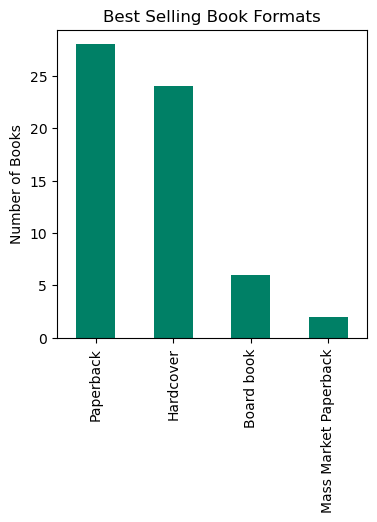

In [11]:
#Visualize the distribution of each format
books['book_format'].value_counts().sort_values(ascending = False).plot(kind='bar', cmap = 'summer', figsize = (4,4), title = 'Best Selling Book Formats',ylabel = 'Number of Books')

- There are four book formats in the dataset, most of the bestsellers are paperback books, closely followed by hardcover books. Board book and Mass market paperback had the lowest number of bestsellers.

In [12]:
#Average price for each format
books.groupby('book_format')['price'].mean().sort_values(ascending = False)

book_format
Mass Market Paperback    21.160000
Hardcover                14.601304
Paperback                 9.806296
Board book                5.006667
Name: price, dtype: float64

Text(0.5, 1.0, 'Price by Book Format')

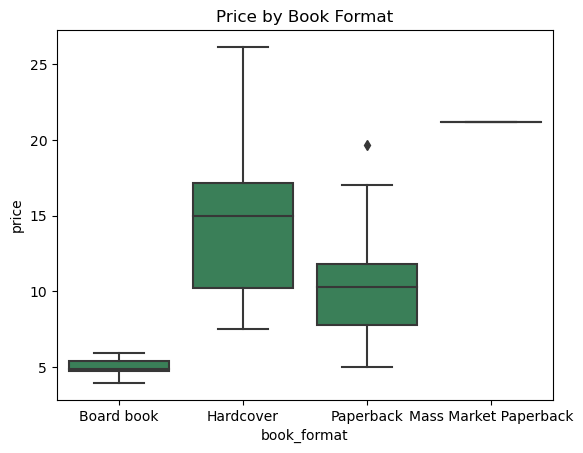

In [13]:
#Visualize the price for each book format
sns.boxplot(x = 'book_format',y = 'price',data = books, color = 'seagreen')
plt.title("Price by Book Format")

- Mass Market Paperback is the most expensive book format, while Board book is the least expensive book format.

In [14]:
#Top 10 books by price
books.sort_values(by = 'price',ascending = False)[0:10]

,title,author,book_format,review,rating,price,year
48,Hamilton: The Revolution,Lin-Manuel Miranda,Hardcover,14250,4.9,26.13,2016
29,Thug Kitchen: The Official Cookbook: Eat Like ...,NaN,Hardcover,15069,4.6,22.99,2015
45,To Kill a Mockingbird,Harper Lee,Mass Market Paperback,130592,4.7,21.16,2016
11,To Kill a Mockingbird,Harper Lee,Mass Market Paperback,130592,4.7,21.16,2015
4,StrengthsFinder 2.0,NaN,Hardcover,8178,4.1,20.96,2015
31,StrengthsFinder 2.0,NaN,Hardcover,8178,4.1,20.96,2016
59,The 7 Habits of Highly Effective People: Power...,Stephen R. Covey,Paperback,9405,4.7,19.65,2016
41,Killing the Rising Sun: How America Vanquished...,Bill O'Reilly,Hardcover,21299,4.6,19.36,2016
36,When Breath Becomes Air,Paul Kalanithi,Hardcover,99709,4.7,17.34,2016
20,The Boys in the Boat: Nine Americans and Their...,Daniel James Brown,Paperback,82119,4.6,16.99,2015


- Hamilton: The Revolution is the most expensive of the books in the dataset.

- To Kill a Mockingbird made the bestsellers list in 2015 and 2016.

In [15]:
#Top 10 books by rating
books.sort_values(by = 'rating',ascending = False)[0:10]

,title,author,book_format,review,rating,price,year
58,The Very Hungry Caterpillar,Eric Carle,Board book,59835,4.9,5.57,2016
21,"Jesus Calling, Padded Hardcover, with Scriptur...",Sarah Young,Hardcover,43004,4.9,8.89,2015
18,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,Board book,28326,4.9,5.00,2015
48,Hamilton: The Revolution,Lin-Manuel Miranda,Hardcover,14250,4.9,26.13,2016
34,"Oh, the Places You'll Go!",Dr. Seuss,Hardcover,48035,4.9,7.49,2016
16,"Oh, the Places You'll Go!",Dr. Seuss,Hardcover,48035,4.9,7.49,2015
14,Humans of New York : Stories,Brandon Stanton,Hardcover,5378,4.9,15.69,2015
37,Giraffes Can't Dance (Board Book),NaN,Board book,28899,4.8,5.94,2016
38,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,Paperback,89707,4.8,8.39,2016
26,The 5 Love Languages: The Secret to Love that ...,Gary Chapman,Paperback,89707,4.8,8.39,2015


- from the table above, we see that 6 books had the highest rating of 4.9.
- We also see that 'The 5 Love Languages' and 'Oh, the places you'll go' were among the bestsellers in both 2015 and 2016.

In [16]:
#check for other books that made the bestsellers list in 2015 and 2016
books.groupby('title')['title'].count().sort_values(ascending = False).head(10)

title
Laugh-Out-Loud Jokes for Kids                                                             2
To Kill a Mockingbird                                                                     2
How to Win Friends & Influence People (Dale Carnegie Books)                               2
Mindset: The New Psychology of Success                                                    2
Oh, the Places You'll Go!                                                                 2
StrengthsFinder 2.0                                                                       2
The Life-Changing Magic of Tidying Up: The Japanese Art of Decluttering and Organizing    2
The 5 Love Languages: The Secret to Love that Lasts                                       2
The Girl on the Train                                                                     2
First 100 Words: A Padded Board Book                                                      2
Name: title, dtype: int64

- 10 books appeared in the bestsellers list in 2015 and 2016

In [17]:
#average number of reviews by book format
books.groupby('book_format')['review'].mean().sort_values(ascending = False)

book_format
Mass Market Paperback    130592.000000
Paperback                 63954.071429
Hardcover                 63927.916667
Board book                34765.833333
Name: review, dtype: float64

Text(0.5, 1.0, 'Number of Reviews by Book format')

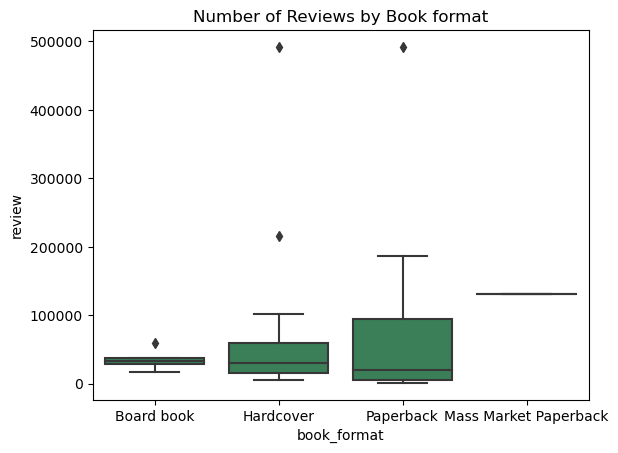

In [18]:
#visualize the number of reviws by book format
sns.boxplot(x = 'book_format',y = 'review',data = books, color = 'seagreen')
plt.title("Number of Reviews by Book format")

- Despite only 2 mass market books making the bestsellers list, they had the highest number of reviews.

In [19]:
#rating by book format
books.groupby('book_format')['rating'].mean().sort_values(ascending = False)

book_format
Board book               4.800000
Mass Market Paperback    4.700000
Paperback                4.610714
Hardcover                4.554167
Name: rating, dtype: float64

Text(0.5, 1.0, 'Ratings by Book Format')

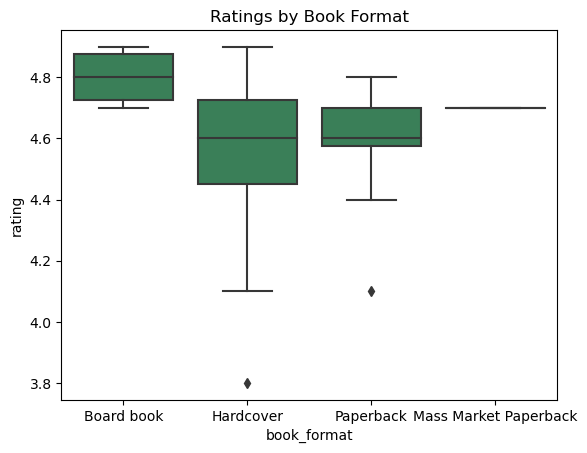

In [20]:
#Visualize book format rating
sns.boxplot(x = 'book_format',y = 'rating',data = books, color = 'seagreen')
plt.title("Ratings by Book Format")

Board book books had the highest rating, while hardcover books had the least rating.

In [21]:
#Top 10 authors based on number of times their book made the list
books.groupby('author')['title'].count().sort_values(ascending = False).head(10)

author
Harper Lee         3
Rob Elliott        3
Dale Carnegie      2
Johanna Basford    2
Gary Chapman       2
Marjorie Sarnat    2
Paula Hawkins      2
Dr. Seuss          2
J.K. Rowling       2
Jeff Kinney        2
Name: title, dtype: int64

In [22]:
#Top 10 authors based on average book rating
books.groupby('author')['rating'].mean().sort_values(ascending = False).head(10)

author
Dr. Seuss             4.90
Rod Campbell          4.90
Brandon Stanton       4.90
Sarah Young           4.90
Eric Carle            4.90
Lin-Manuel Miranda    4.90
Gary Chapman          4.80
Sandra Boynton        4.80
Drew Daywalt          4.80
Marjorie Sarnat       4.75
Name: rating, dtype: float64

Text(0.5, 1.0, 'Book Ratings by Price')

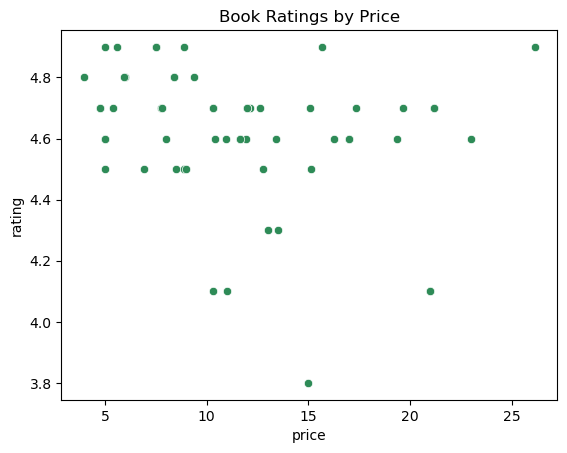

In [23]:
#Is there a relationship between book price and rating?
sns.scatterplot(x = 'price',y = 'rating',data = books, color = 'seagreen')
plt.title("Book Ratings by Price")

Text(0.5, 1.0, 'Book Ratings by Number of Reviews')

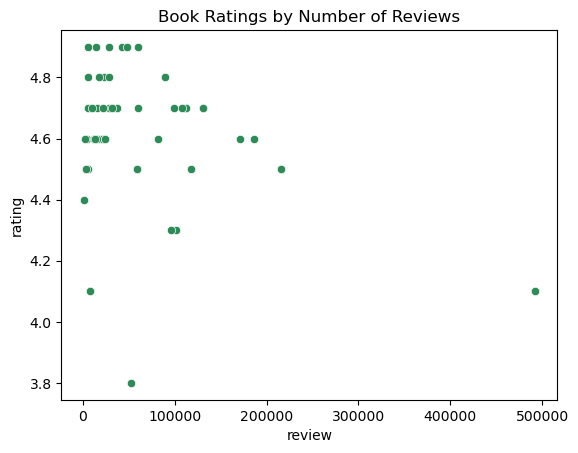

In [24]:
#Is there a relationship between book ratings and number of reviews?
sns.scatterplot(x = 'review',y = 'rating',data = books, color = 'seagreen')
plt.title("Book Ratings by Number of Reviews")

Text(0.5, 1.0, 'Number of Reviews by Book Price')

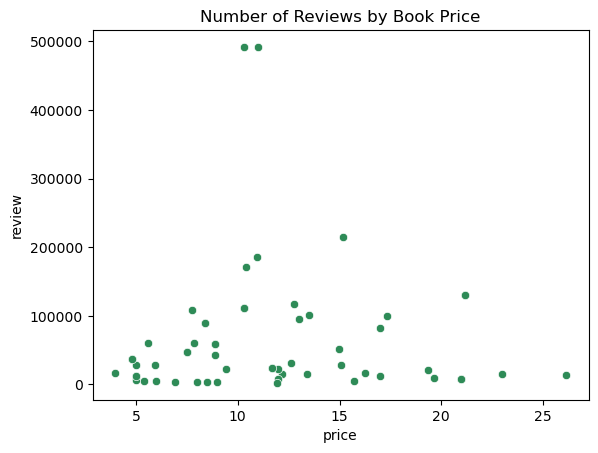

In [25]:
#Is there a relationship between price and number of reviews?
sns.scatterplot(x = 'price',y = 'review',data = books, color = 'seagreen')
plt.title("Number of Reviews by Book Price")

There is no direct relationship between price, review and rating.

**Conclusion**

Of the 30 best selling books in 2015 and 2016:

- There were four major book formats - Hardcover, Paperback, Mass Market Paperback and Board Book.
- Mass Market Paperback had the most expensive books, while Board book had the least expensive.
- Mass Market Paperback also had the highest number of reviews, despite only two books in that format making the list.
- Board books had the highest rating on average, while Hardcover books had the least.
- Hamilton: The Revolution, was the most expensive book in the dataset, with a price of USD 26.13.
- 6 books had the highest rating of 4.9.
- 10 books appeared in the best sellers list in both years.
- There is no direct relationship between the price, review and rating of a book.
